## Observations and Insights 

In [152]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(study_results, mouse_metadata, how= 'left', on=["Mouse ID"])

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [153]:
# Checking the number of mice.
len(complete_data.drop_duplicates("Mouse ID"))

249

In [154]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicate = complete_data_df[complete_data_df.duplicated(["Mouse ID", "Timepoint"])]

In [155]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate_df = mouse_duplicate.drop_duplicates()
mouse_duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [156]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_duplicate_location=mouse_duplicate_df.index
complete_data_clean_df=complete_data_df.drop(mouse_duplicate_location)
complete_data_clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [157]:
# Checking the number of mice in the clean DataFrame.
len(complete_data_clean_df.drop_duplicates('Mouse ID'))

249

## Summary Statistics

In [158]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_groups_df={}
regimen_list=complete_data_clean_df['Drug Regimen'].unique()

for i in regimen_list:
    regimen_groups_df[i]=[]

for regimen in regimen_groups_df:
    regimen_groups_df[regimen]=complete_data_clean_df[complete_data_clean_df['Drug Regimen']==regimen]["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
pd.DataFrame(regimen_groups_df)    

,Capomulin,Ketapril,Naftisol,Infubinol,Stelasyn,Ramicane,Propriva,Zoniferol,Placebo,Ceftamin
mean,40.675741,55.235638,54.331565,52.884795,54.233149,40.216745,52.393463,53.236507,54.033581,52.591172
median,41.557809,53.698743,52.509285,51.820584,52.431737,40.673236,50.909965,51.818479,52.288934,51.776157
var,24.947764,68.553577,66.173479,43.128684,59.450562,23.486704,43.138803,48.533355,61.168083,39.290177
std,4.994774,8.279709,8.134708,6.567243,7.710419,4.846308,6.568014,6.966589,7.821003,6.268188
sem,0.329346,0.603860,0.596466,0.492236,0.573111,0.320955,0.525862,0.516398,0.581331,0.469821


In [159]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
regimen_groups_grby=complete_data_clean_df.groupby('Drug Regimen')
regimen_groups2_df=regimen_groups_groupby['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem']) #add statistical data
regimen_groups2_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [160]:
regimen_groups3_grby=complete_data_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
regimen_groups3_grby

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

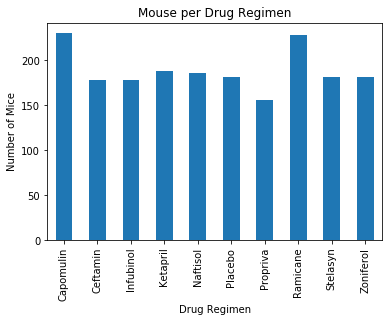

In [161]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

total_mice = complete_data_clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
total_mice.plot(kind='bar')

plt.title("Mouse per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

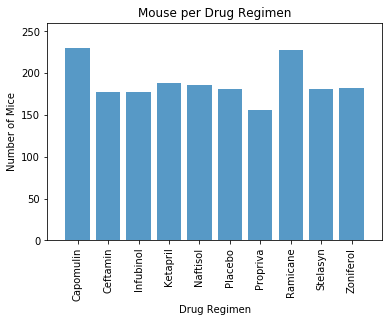

In [162]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(total_mice))
plt.bar(x_axis, total_mice, alpha = .75, align="center")
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, total_mice.index, rotation="vertical")
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(total_mice)+30)
plt.title("Mouse per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

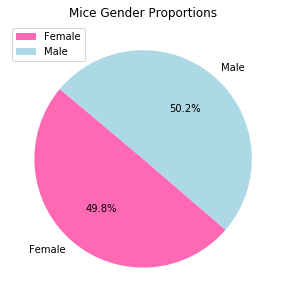

In [163]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = complete_data_clean_df.groupby(["Sex", "Mouse ID"]).size() 
gender_pie = pd.DataFrame(gender.groupby(["Sex"]).count()) 
gender_pie.columns = ["Total Count"]

colors = ["hotpink", "lightblue"]
gender_pie.groupby(["Sex"]).sum().plot(kind='pie', y= "Total Count", startangle=140, figsize=(5,5), colors= colors, autopct='%1.1f%%')
plt.legend(loc= "upper left")
plt.title("Mice Gender Proportions") 
plt.ylabel("") 
plt.show()

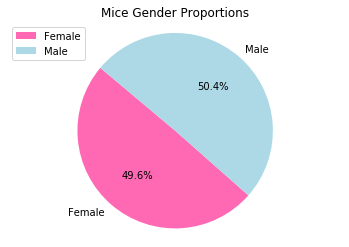

In [164]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Female", "Male"] 
count = [123, 125] 
colors = ["hotpink", "lightblue"]

plt.pie(count, labels=gender, colors=colors, autopct="%1.1f%%", startangle=140)
plt.axis("equal") 
plt.legend(loc="upper left")
plt.title("Mice Gender Proportions") 
plt.show()

## Quartiles, Outliers and Boxplots

In [165]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mouse_id = complete_data_clean_df.groupby(['Drug Regimen','Mouse ID'])
mouse_timepoint = mouse_id['Timepoint'].max() 
complete_data_clean2_df = pd.merge(complete_data_clean_df, mouse_timepoint, on="Mouse ID") 
complete_data_clean2_df = complete_data_clean2_df.rename(columns={"Timepoint_x":"Timepoint","Timepoint_y": "Max Timepoint"}) 


ramicane_data=complete_data_clean2_df[complete_data_clean2_df["Drug Regimen"]=='Ramicane']
capomulin_data=complete_data_clean2_df[complete_data_clean2_df["Drug Regimen"]=='Capomulin']
ceftamin_data=complete_data_clean2_df[complete_data_clean2_df["Drug Regimen"]=='Ceftamin']
infubinol_data=complete_data_clean2_df[complete_data_clean2_df["Drug Regimen"]=='Infubinol']

complete_data_clean2_df=pd.concat([ramicane_data,capomulin_data,ceftamin_data,infubinol_data]) 
complete_data_clean2_df
timepoint_df=complete_data_clean2_df[complete_data_clean2_df['Timepoint']==complete_data_clean2_df['Max Timepoint']] 
timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
442,c458,30,38.342008,2,Ramicane,Female,23,20,30
450,q610,35,36.561652,2,Ramicane,Female,18,21,35
460,j913,45,31.560470,1,Ramicane,Female,4,17,45
470,a411,45,38.407618,1,Ramicane,Male,3,22,45
480,a444,45,43.047543,0,Ramicane,Female,10,25,45
...,...,...,...,...,...,...,...,...,...
1439,v766,15,51.542431,1,Infubinol,Male,16,27,15
1444,w193,20,50.005138,0,Infubinol,Male,22,30,20
1454,e476,45,62.435404,1,Infubinol,Male,23,26,45
1461,w584,30,58.268442,1,Infubinol,Male,3,29,30


In [166]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

test_regimen_list=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
drug_df=pd.DataFrame({
                'Ramicane':["","","","","",""],
                'Capomulin':["","","","","",""],
                'Infubinol':["","","","","",""],
                'Ceftamin':["","","","","",""]})
drug_df=drug_df.set_index(keys=[["Lower Quartile","Median","Upper Quartile","IQR","Lower Bound","Upper Bound"]]) 

regimen_groups=timepoint_df.groupby('Drug Regimen') 
quartiles = regimen_groups['Tumor Volume (mm3)'].quantile([.25,.5,.75])
for regimen in drug_df:
    lowerq = quartiles[regimen][0.25]
    median= quartiles[regimen][0.5]
    upperq = quartiles[regimen][0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    drug_df[regimen][0]=lowerq
    drug_df[regimen][1]=median
    drug_df[regimen][2]=upperq
    drug_df[regimen][3]=iqr
    drug_df[regimen][4]=lower_bound
    drug_df[regimen][5]=upper_bound
drug_df

,Ramicane,Capomulin,Infubinol,Ceftamin
Lower Quartile,31.5605,32.3774,54.0486,48.7221
Median,36.5617,38.1252,60.1652,59.852
Upper Quartile,40.659,40.1592,65.5257,64.2998
IQR,9.09854,7.78186,11.4771,15.5778
Lower Bound,17.9127,20.7046,36.8329,25.3554
Upper Bound,54.3068,51.832,82.7414,87.6665


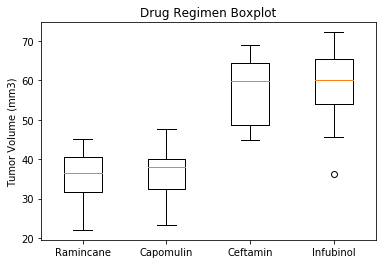

In [167]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#restore drug data
ramicane = timepoint_df[timepoint_df["Drug Regimen"]=='Ramicane']
ramicane_tumor = ramicane['Tumor Volume (mm3)']
capomulin = timepoint_df[timepoint_df["Drug Regimen"]=='Capomulin']
capomulin_tumor = capomulin['Tumor Volume (mm3)']
ceftamin = timepoint_df[timepoint_df["Drug Regimen"]=='Ceftamin']
ceftamin_tumor = ceftamin['Tumor Volume (mm3)']
infubinol = timepoint_df[timepoint_df["Drug Regimen"]=='Infubinol']
infubinol_tumor = infubinol['Tumor Volume (mm3)']


tumor_data=[ramicane_tumor, capomulin_tumor, ceftamin_tumor, infubinol_tumor]
fig1, axes = plt.subplots()
axes.set_title('Drug Regimen Boxplot')
axes.set_ylabel('Tumor Volume (mm3)')
axes.boxplot(tumor_data, labels=['Ramincane','Capomulin', 'Ceftamin', 'Infubinol'])
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse: b128')

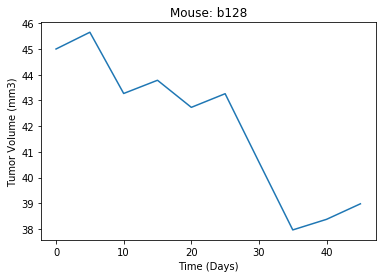

In [168]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse = capomulin['Mouse ID'].iloc[0]
mouse_data = complete_data_clean2_df[complete_data_clean2_df['Mouse ID']==mouse]


plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')
plt.title(f'Mouse: {mouse}')

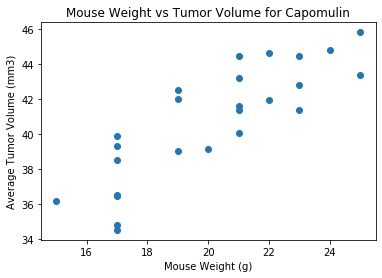

In [169]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = complete_data_clean_df.loc[complete_data_clean_df["Drug Regimen"] == "Capomulin",:]
capomulin_avg = capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Tumor Volume for Capomulin")

plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


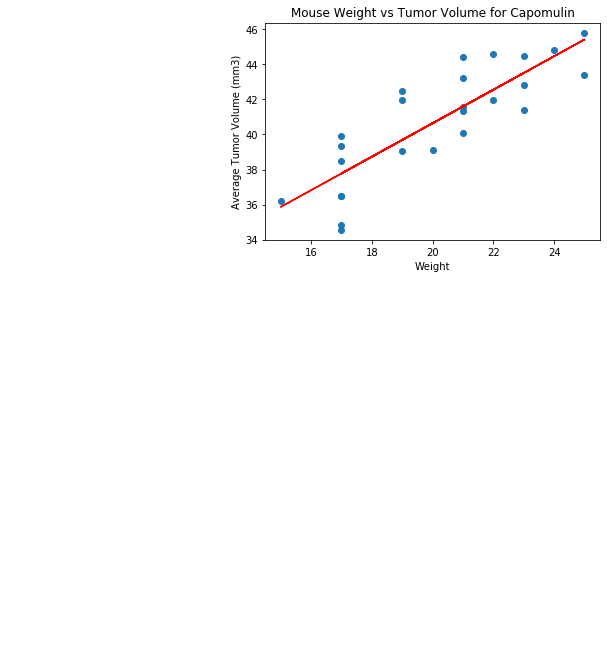

In [170]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation  = round(st.pearsonr(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

x_values = capomulin_avg["Weight (g)"]
y_values = capomulin_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10), color="red")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs Tumor Volume for Capomulin")
plt.show()